## Playing around with the Iris Dataset

For the past few days, I have been messing around with data science and I feel like I have gathered enough theorethical knowledge to be able to start working on a practical project, while also learning more. This project will look more like a child's playground than an organized professionals work, and that is because at this point I am just playing around with different data science methods, trying to figure out connections between flowers.That being said, I will try to keep it as clean as possible and I will try to keep the presentation as neat as I can. Here's a flower to get us strated.

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Iris_virginica_2.jpg" width="300" height="300" align="center"/>
The Iris Virginica, one of the flowers in our dataset

In [18]:
# Let's import all the libraries and modules we will be working with

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
# We can load the data and turn it into a pandas DataFrame so that we can work with it

Iris = datasets.load_iris() 
ir = pd.DataFrame(Iris.data,columns=Iris.feature_names)

xi = ir
yi = pd.DataFrame(Iris.target,columns=["Flower Type"])
fd = pd.concat([xi, yi,], axis=1)

fd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
os = fd[fd["Flower Type"] == 0]         # contains only setosa
ove = fd[fd["Flower Type"] == 1]        # contains only versicolor
ovr = fd[fd["Flower Type"] == 2]        # containts only virginica

In [21]:
class_feature_means = pd.DataFrame(columns=[0,1,2])

for c, rows in fd.groupby('Flower Type'):
    class_feature_means[c] = rows.mean()
class_feature_means


,0,1,2
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026
Flower Type,0.000,1.000,2.000


<h1 align=left><font size = 5>The Iris Dataset</font></h1>

In 1936, Ronald Fisher introduced the Iris Dataset as an example of Linear Discrimant Analysis, which is a method used to characterize or seperate two or more classes of objects. 

**Question:** Can we do what Ronald Fisher did, and accurately classify the 3 different Iris Flower Types in the data?

Before we get into any kind of coding, we should first understand what data we're working with here. Our data has four features Sepal length, sepal width, petal length and petal width. The sepal and the petal of a flower are demonstrated on the picture below.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg" width="200" height="200" align="center"/>

Below we can see that our dataset has 150 rows and 4 columns. Then we can see the first 5 rows of the dataset

In [22]:
ir.shape

(150, 4)

In [23]:
ir.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let's explore the different characteristics of our data.

In [24]:
ir.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We use a scatter plot to determine if there is a linear correlation between sepal length and sepal width. The points seem to be distributed randomly, so there is no linear relationship between sepal length and sepal width.

Text(0, 0.5, 'Sepal length')

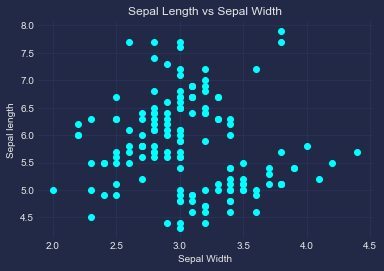

In [272]:
y = ir["sepal length (cm)"]
x = ir["sepal width (cm)"]

plt.style.use("cyberpunk")
plt.scatter(x,y, color="cyan")

plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal length")

We plot the relationship between petal width and petal length. We can see that the wider the petals get, the longer they get. This indicates a positive linear relationship between the two variables

(0.0, 7.195)

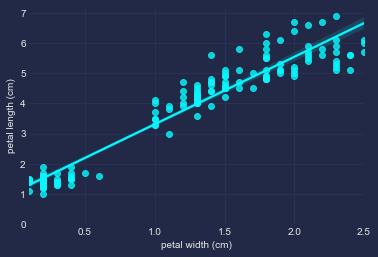

In [26]:
sns.regplot(x="petal width (cm)", y="petal length (cm)", data=ir)
plt.ylim(0,)

Instead of creating a plot for each combination of the features, we simply just check the correlation between the different variables. We can see that:
- sepal length and petal length are moderately correlated with a positive linear relationship (0.87) 
- sepal length and petal width are moderately correlated with a positive linear relationship  (0.81)
- petal width and petal length are higly correlated with a positive linear relationship  (0.96)

In [27]:
ir.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Next, we want to measure the correlation between our features. We can do this by calculating the Pearson Correlation Coefficient and the P-Value. The correlation coefficient is the same as the correlation shown above. The smaller the P-Value, the higher the significance. We can see that our 3 chosen combinations are all correlated with a very small P-Value, meaning that they are all significant.

In [28]:
from scipy import stats

print("Sepal Length vs Petal Length")
pc, pv = stats.pearsonr(ir["sepal length (cm)"], ir["petal length (cm)"])
print("The Correlation Coefficient is: ", pc, "\nThe P-Value is: ", pv)

print("\nSepal Length vs Petal Width")
pc, pv = stats.pearsonr(ir["sepal length (cm)"], ir["petal width (cm)"])
print("The Correlation Coefficient is: ", pc, "\nThe P-Value is: ", pv)

print("\nPetal Width vs Petal Length")
pc, pv = stats.pearsonr(ir["petal width (cm)"], ir["petal length (cm)"])
print("The Correlation Coefficient is: ", pc, "\nThe P-Value is: ", pv)

Sepal Length vs Petal Length
The Correlation Coefficient is:  0.8717537758865833 
The P-Value is:  1.0386674194496954e-47

Sepal Length vs Petal Width
The Correlation Coefficient is:  0.8179411262715756 
The P-Value is:  2.325498079793272e-37

Petal Width vs Petal Length
The Correlation Coefficient is:  0.9628654314027963 
The P-Value is:  4.6750039073255585e-86


If we compare Sepal Width and Sepal Length, we can see that the correlation is low, and that the P-Value is high, meaning that these values are not significant.

In [29]:
print("\nSepal Width vs Sepal Length")
pc, pv = stats.pearsonr(ir["sepal width (cm)"], ir["sepal length (cm)"])
print("The Correlation Coefficient is: ", pc, "\nThe P-Value is: ", pv)


Sepal Width vs Sepal Length
The Correlation Coefficient is:  -0.11756978413300208 
The P-Value is:  0.15189826071144766


# Can we predict petal width, based on known other features?

This is a very good and very important question in Data Science. It is also relatively simple to answer. From our above values, we know that petal width is correlated with petal length and sepal length. We can use multiple linear regression to predict the petal width of an iris flower, based on petal length and sepal length.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
X = ir[["sepal length (cm)", "petal length (cm)", ]]
Y = ir[["petal width (cm)"]]
lm.fit(X,Y)
Yhat = lm.predict(X)
print("The intercept is: ", lm.intercept_, "\nThe coefficients are: ", lm.coef_)

print(X[0:2].to_string(index=False))
print(Yhat[0:2])

mse = mean_squared_error(Y['petal width (cm)'], Yhat)

print("\nR Squared: ", lm.score(X,Y))
print("\nMSE: ", mse)
# We can say that 0.93% of the variaton of the petal width is explained by our Linear Model

The intercept is:  [-0.00899597] 
The coefficients are:  [[-0.08221782  0.44937611]]
 sepal length (cm)  petal length (cm)
               5.1                1.4
               4.9                1.4
[[0.2008197 ]
 [0.21726327]]

R Squared:  0.9290248640257686

MSE:  0.040962085264089815


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
lre=LinearRegression()
lre.fit(x_train, y_train)

Rcross = cross_val_score(lre, x_test, y_test, cv=4)
print("Mean of the folds: ", Rcross.mean())
print("Standard deviation: ", Rcross.std())


Mean of the folds:  0.9217123919650492
Standard deviation:  0.03507468815311565


### The resulting function is:

Petal Width = -0.8221782 - (0.08221782) * sepal length + 0.44937611 * petal length


If we take the mean values from our table above, 5.84 for sepal length and 3.76 for petal length, we can just drop them into our function and get the predicted Petal width:

Petal Width = -0.8221782 - (0.08221782 * 5.84) + (0.44937611 * 3.76)

We get 0.3873239048

## Distribution Plot

We use a distribution plot to compare the results of our model with actual values. We can see that our model has inconsistencies in the range from petal width 0.5 to petal width 2.0. 

Note that the y axis represents the density of probability, which is the chance of obtaining values near corresponding points on the X axis. From 0.5 to 1.25 the probablity of obtaining a corresponding value is lower than that of the actual values, and after 1.25 to 2.25 the probability is much higher.

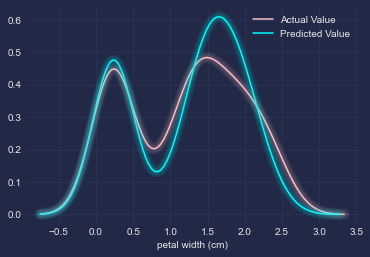

In [48]:
ax1 = sns.distplot(Y["petal width (cm)"], hist = False, color = "pink", label = "Actual Value") 
sns.distplot(Yhat, hist = False, color = "cyan", label = "Predicted Value")

mplcyberpunk.make_lines_glow()

### Back to the original Question

We make to dataframes. xi contains the different Features and yi contains the Flower Type. The three flower types are "setosa", "versicolor" and "virginica". For statistical ease these values are encoded as 0,1,2

**Classification:**
- "0" : setosa
- "1" : versicolor
- "2" : virginica

LDA or Linear Discriminant Analysis is used because we originally have four dimensions to seperate our data. We want to reduce those four dimensions as much as we can, while retaining as much data as possible. At the same time, LDA is seperating the data as much as it can, while keeping the variance of the data as low as possible.

First we will split the Data into testing and training data. We will use the training data to train our model, and we will use the test data to get a valuation on how well our data works.

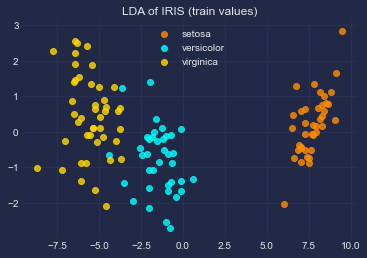

In [270]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


xi = ir
yi = pd.DataFrame(Iris.target,columns=["Flower Type"])

xi_train, xi_test, yi_train, yi_test = train_test_split(xi, yi, test_size=0.2, random_state=1)  # Separating the data into training and test data

yi_train = yi_train.values[:,0]
xi_train = xi_train.values
xi_test = xi_test.values
yi_test = yi_test.values[:,0]


lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(xi_train, yi_train).transform(xi_train)

colors = ['darkorange', 'cyan', 'gold']

for color, i, target_name in zip(colors, [0,1,2], Iris.target_names):
    plt.scatter(X_r2[yi_train == i, 0], X_r2[yi_train == i, 1], alpha = 0.8, label = target_name, color = color)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('LDA of IRIS (train values)')

In [278]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import _classification as classif

ldascore = lda.score(xi_test,yi_test)
print("The accuracy score based on test data: ", ldascore)

The accuracy score based on test data:  1.0


# Conclusion and Final Thoughts

When I started doing this project, I knew nothing about LDA and didn't understand much about machine learning concepts. As time slowly went by while I was reading about eigenvectors, eigenvalues and staring at complex looking mathematical formulas (that really aren't that complex), things started to slowly make sense. I realized that LDA is really useful for simplifying the dimensions of objects that we already know the categories of in order to split them up well.

As a result, we have a nice looking graph, but we also have a model that has an accuracy score of 1.0 on the test data. In other words, it accurately classified all of the test data. I am surprised and impressed, that this model has such a high accuracy rate. I was expecting something around 90% maybe 95% accuracy, but this is feasible since this is a practice dataset, which has been created by one of the most renown statisticians of the 20th century. 

Instead of thinking about classifying flowers, I'd like to take this last portion of my project, to document my thoughts on how I think an LDA Model could be used in some practical cases. As I understand, LDA has 2 purposes: Classification and Dimensionality Reduction. 

During my reaserach, I read that LDA is used in facial recognition. This makes sense, because our faces are made up of so many different features. In order to be able to recognize a face, one would need to first reduce the features that a face can have, to only two and then classify them. This could be used to predict things like: ethnicity, aesthetic attractiveness, weight and gender. If you think further, and want to use facial recognition to recognize a particular person, it could be done with an LDA Model, but I think there's porbably a better model for that, since if we have 7 Billion people on the planet, we would need 7 Billion different classes, and our LDA model would be overcrowded.